# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [3]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 20 minutes]
---

### Normal Distributions

Let's consider check totals at a TexMex restaurant. We know that the population distribution of check totals is normally distributed with a mean of $\mu$ = \\$20 and standard deviation of $\sigma$ = \\$3. 

### 1.1) Compute the z-score for a \\$26 check. 

**Answer:**

In [18]:
z_score = (26-20)/3
z_score

2.0

### 1.2) Approximately what percentage of all checks are less than \\$26? Explain how you came to your answer.

You can answer this using the empirical rule or this [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

**ANSWER:**<br>
Approximately 98% of checks are less than $26. I looked up the p-value of 2 in the z-table. The p-value tells us the probability of getting a value less than 26 given the null hypothesis is true. 

### Confidence Intervals

One night, a waiter gets 15 checks with a mean of \\$19 and a standard deviation of \\$3.

### 1.3) Calculate the 95% confidence interval around the mean for this waitor's checks. Interpret the result. 

**ANSWER:**

In [5]:
# alpha: Confidence, df: degrees of freedom, loc: mean, scale: standard deviation
stats.t.interval(alpha = 0.95, df = 14, loc = 19, scale= 3)

(12.565639936249218, 25.43436006375078)

We can be 95% confident that the mean for this waiter's checks will be between 12.56 and 25.43 dollars.

---
## Part 2: Statistical Testing [Suggested time: 20 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

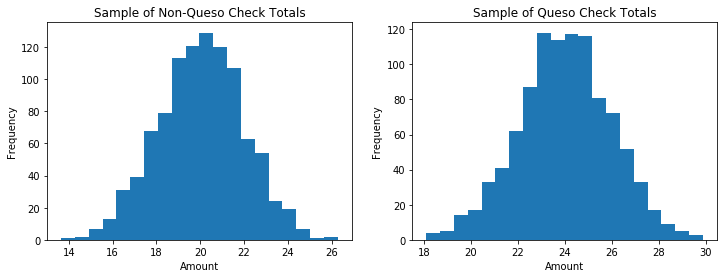

In [6]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

**ANSWER:**<br> 
H<sub>0</sub>: μ = μ<sub>0</sub><br>
H<sub>a</sub>: μ != μ<sub>0</sub>
<br>
<br>
or
<br>
<br>
H<sub>0</sub>: queso ordering customers spend = non-queso ordering customers<br>
H<sub>a</sub>: queso ordering customers spend != non-queso ordering customers

### 2.2) What does it mean to make a `Type I` error or a `Type II` error in this specific context?

**ANSWER:** <br>A type I error would mean that we erroneously concluded customers who order queso do not spend equally to customer who do not order queso ("false positive"). A type II error would be that we erroneously concluded the null hypothesis true when in reality there was a difference in customers who order queso. 

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [7]:
stats.ttest_ind(a= no_queso, b= queso, equal_var=True)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

**Answer:**<br>
With a pvalue of greater than .05 we cannot reject our null hypothesis.

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

A medical test is designed to diagnose a certain disease. The test has a false positive rate of 10%, meaning that 10% of people without the disease will get a positive test result. The test has a false negative rate of 2%, meaning that 2% of people with the disease will get a negative result. Only 1% of the population has this disease.

### 3.1) If a patient receives a positive test result, what is the probability that they actually have the disease? Show how you arrive at your answer.

**Answer:**<br>
10% of people wo disease test pos<br>
90% of people wo disease test pos<br>
2% of people w disease test neg<br>
98% of people w disease test pos<br>
<br>
P(Dis) = .01<br>
P(Pos|Dis) = .98<br>
P(Pos) = ?<br>
P(Dis|Pos) = ?<br>
<br>
Add up people with and without the disease:<br>
people_with_disease = .01*.98<br>
people_wo_disease = .99*.90<br>
Probability Positive: 0.9008<br>
<br>
P(Dis|Pos) = (.01*.98)/.9008 = .0108<br>
<br>
**Answer:** Approximately 1%

---
## Part 4: Linear Regression [Suggested Time: 20 min]
---

In this section, you'll be using the Advertising data to run regression models. In this dataset, each row represents a different product, and we have a sample of 200 products from a larger population of products. We have three features - `TV`, `radio`, and `newspaper` - that describe how many thousands of advertising dollars were spent promoting the product. The target, `sales`, describes how many millions of dollars in sales the product had.

The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [10]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

### Simple Linear Regression

### 4.1) Use StatsModels' `ols`-function to run a linear regression model using `TV` to predict `sales`. 

**Required output:** the summary of this regression model.

In [13]:
simple_model = ols(formula='sales~TV', data=data).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        10:47:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2) Do these results imply that _all_ products that receive more TV advertising have greater sales? Explain how you determined this based on the model output. 

**ANSWER:**<br>According to our low pvalue of < .05 we can determine, with 95% confidence, that products receiving more TV advertising have greater sales and reject the null. For each unit of sales TV ads increase it by .0475.

### Multiple Linear Regression

### 4.3) Compute a correlation matrix for `X`. Does this suggest that any of the features are strongly collinear? 

In [15]:
corr = data.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**ANSWER:** <br>The correlation matrix suggests that none of the features are strongly collinear. The greatest instance of collinearity is between sales and TV (0.782224) which is below our general 0.9 threshold.

### 4.4) Use StatsModels' `ols`-function to run a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the summary of this regression model.

In [17]:
model = ols(formula='sales~TV+radio+newspaper', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        10:55:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.5) Does this model do a better job of predicting sales than the previous model using only the `TV` feature? Explain how you determined this based on the model output. 

**ANSWER:**<br>Our multiple linear regression model does a better job of predicting sales due to our higher R<sup>2</sup> value, which accounts for more of the variance.